<a href="https://colab.research.google.com/github/sharma-kshitij-ks/Pitch-to-SBI-Hackathon/blob/main/Uncertainitycoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset into a DataFrame (assuming you've already done this)
df = pd.read_csv('/content/drive/MyDrive/credit_card_fraud.csv')

# Separate fraud and normal transactions
fraud = df.loc[df['is_fraud'] == 1]
normal = df.loc[df['is_fraud'] == 0]

# Print the shape and summary statistics of the sampled data
print("Number of Fraudulent Transactions:", len(fraud))
print("Data Shape:", df.shape)
print("Data Summary Statistics:")
print(df.describe())





Number of Fraudulent Transactions: 1782
Data Shape: (339607, 15)
Data Summary Statistics:
                 amt            lat           long      city_pop  \
count  339607.000000  339607.000000  339607.000000  3.396070e+05   
mean       70.577984      39.718991    -110.622605  1.071409e+05   
std       161.675242       5.094961      12.651370  2.930299e+05   
min         1.000000      20.027100    -165.672300  4.600000e+01   
25%         9.600000      36.715400    -120.093600  4.710000e+02   
50%        46.460000      39.617100    -111.098500  1.645000e+03   
75%        83.350000      41.710000    -100.621500  3.543900e+04   
max     28948.900000      66.693300     -89.628700  2.383912e+06   

           merch_lat     merch_long       is_fraud  
count  339607.000000  339607.000000  339607.000000  
mean       39.718853    -110.622383       0.005247  
std         5.130894      12.663998       0.072248  
min        19.027422    -166.671575       0.000000  
25%        36.817194    -119.823

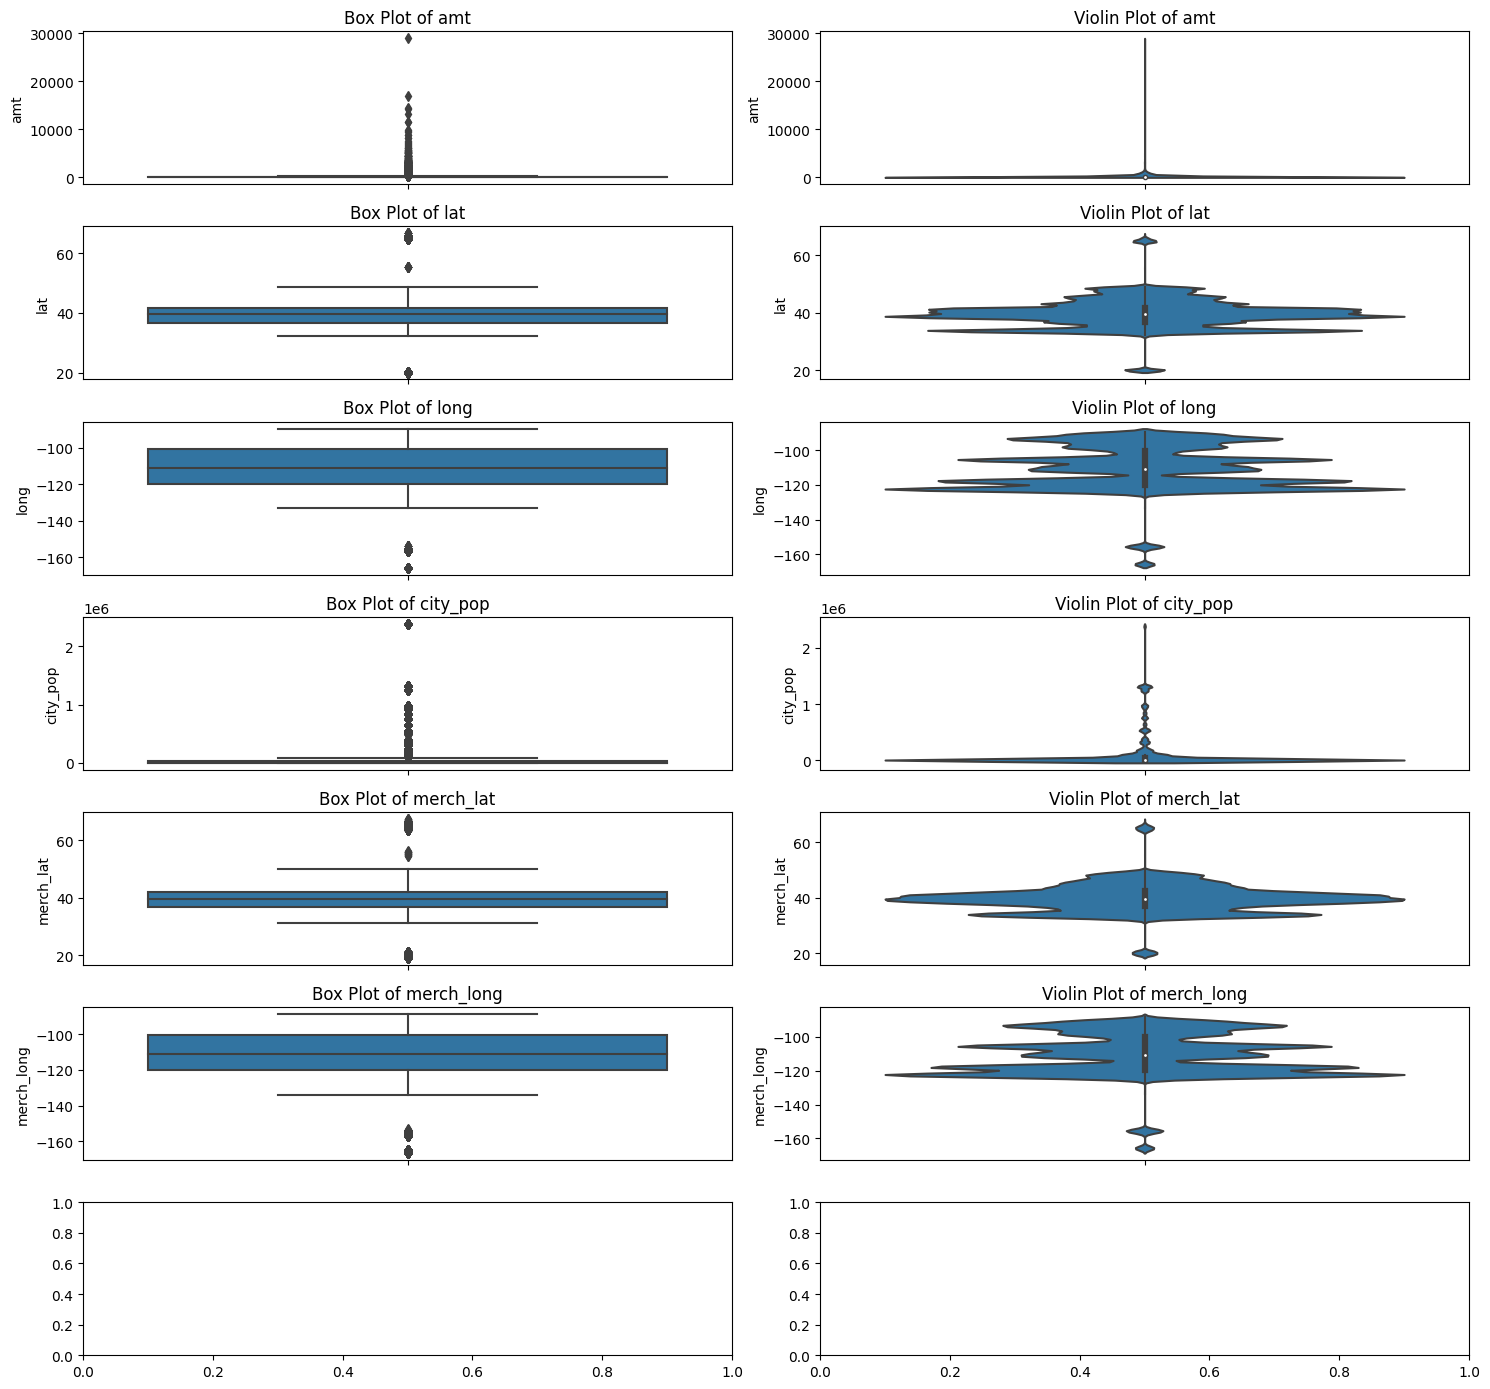

In [3]:
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age']
# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 2 * len(numerical_columns)))
for i, column in enumerate(numerical_columns):
  if column!='age':
      # Create a box plot
      sns.boxplot(data=df, y=column, ax=axes[i, 0])
      axes[i, 0].set_title(f'Box Plot of {column}')
      # Create a violin plot
      sns.violinplot(data=df, y=column, ax=axes[i, 1])
      axes[i, 1].set_title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()


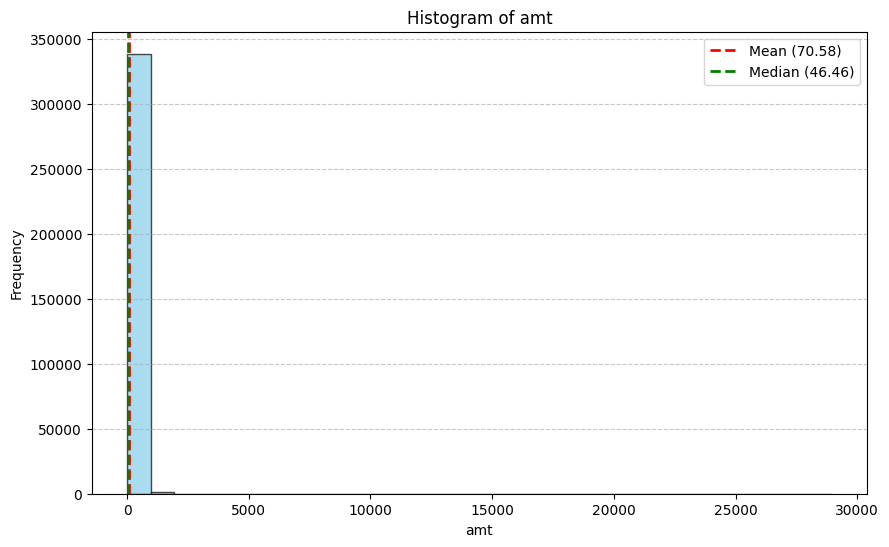

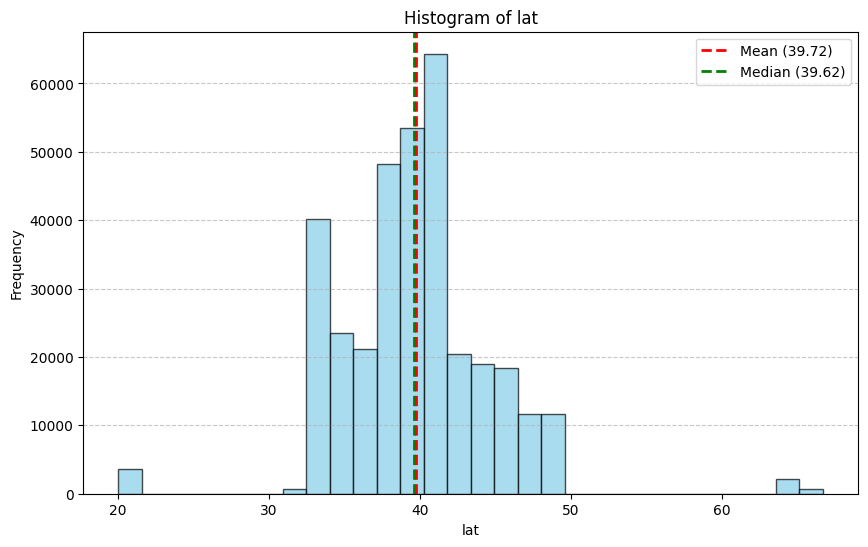

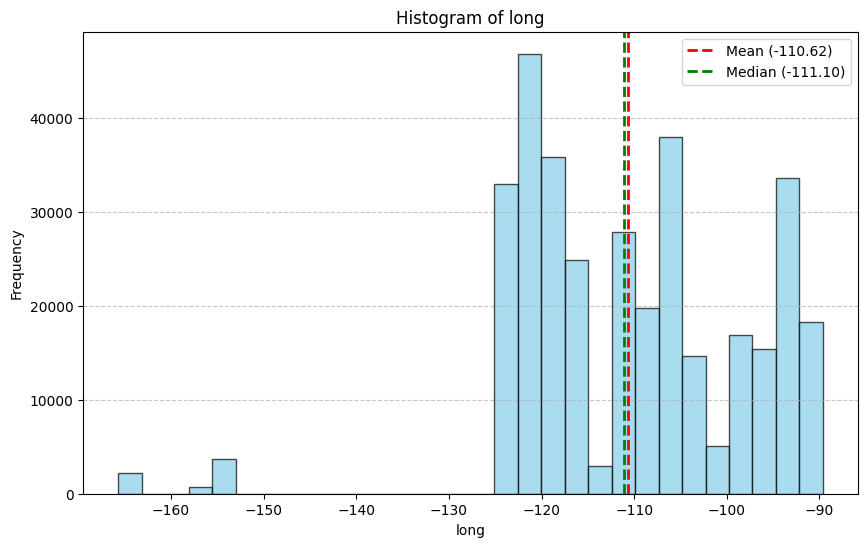

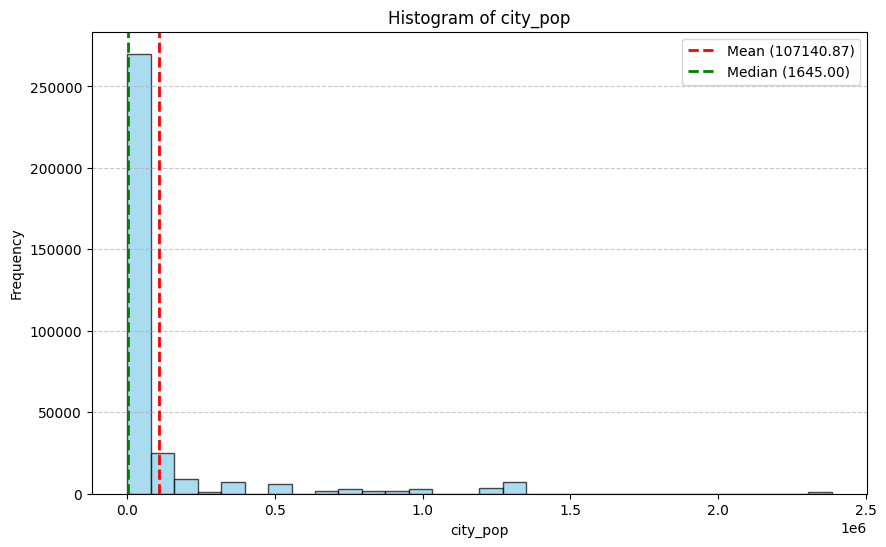

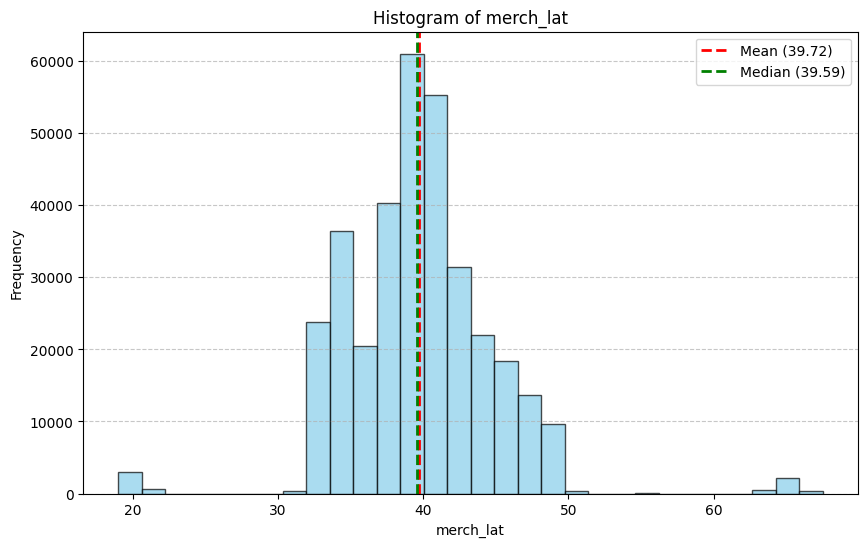

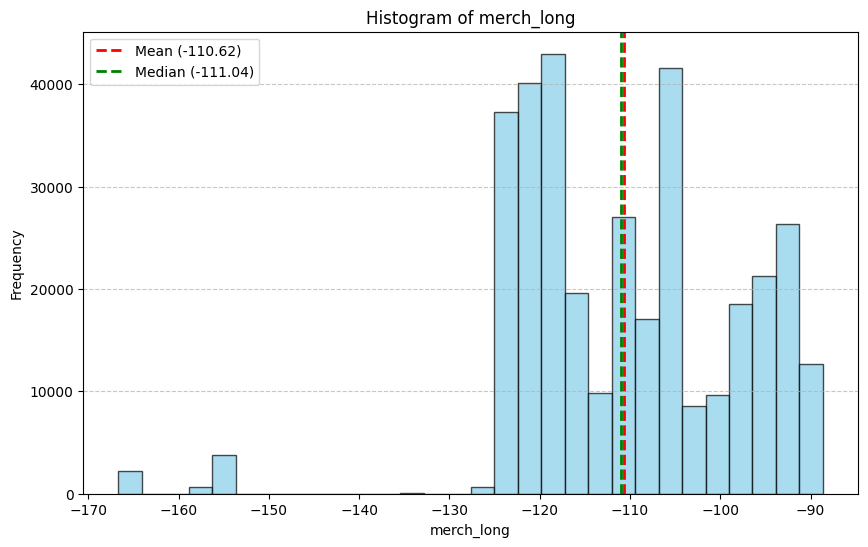

In [4]:
for numerical_column in numerical_columns:
    if numerical_column != 'age':
        plt.figure(figsize=(10, 6))
        plt.hist(df[numerical_column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Histogram of {numerical_column}')
        plt.xlabel(numerical_column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        mean_value = df[numerical_column].mean()
        median_value = df[numerical_column].median()
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean_value:.2f})')
        plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median ({median_value:.2f})')
        plt.legend()
        plt.show()

In [5]:
# Drop irrelevant columns
df.drop(['trans_num'], axis=1, inplace=True)
# Extract useful features from 'trans_date_trans_time'
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour_of_day'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'])
# Calculate age from 'dob' and the transaction date
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year)
df.drop(['dob'], axis=1, inplace=True)
df.drop(['trans_date_trans_time'], axis=1, inplace=True)
# Encode categorical variables using Label Encoding
label_encoders = {}
categorical_columns = ['merchant', 'category', 'city', 'state', 'job']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Standardize numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# Initializing the ANN
model = Sequential()
# Adding the input layer and first Hidden Layer
model.add(Dense(activation="relu", input_dim=14, units=64, kernel_initializer='uniform'))
# Adding the Second hidden layer
model.add(Dense(activation="relu", units=128, kernel_initializer='uniform'))
# Adding the third hidden layer
model.add(Dense(activation="relu", units=64, kernel_initializer='uniform'))
# Addinng the output Layer
model.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))
model.summary()
# compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,601
Trainable params: 17,601
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Split the data into features (X) and target (y)
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Fit the model to the training data
model.fit(X_train, y_train, batch_size = 20, epochs =35)


# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")




Epoch 1/35
13585/13585 [==============================] - 58s 4ms/step - loss: 0.0247 - accuracy: 0.9948
Epoch 2/35
13585/13585 [==============================] - 53s 4ms/step - loss: 0.0236 - accuracy: 0.9947
Epoch 3/35
13585/13585 [==============================] - 51s 4ms/step - loss: 0.0225 - accuracy: 0.9949
Epoch 4/35
13585/13585 [==============================] - 54s 4ms/step - loss: 0.0216 - accuracy: 0.9954
Epoch 5/35
13585/13585 [==============================] - 51s 4ms/step - loss: 0.0210 - accuracy: 0.9956
Epoch 6/35
13585/13585 [==============================] - 53s 4ms/step - loss: 0.0207 - accuracy: 0.9955
Epoch 7/35
13585/13585 [==============================] - 52s 4ms/step - loss: 0.0206 - accuracy: 0.9956
Epoch 8/35
13585/13585 [==============================] - 52s 4ms/step - loss: 0.0197 - accuracy: 0.9957
Epoch 9/35
13585/13585 [==============================] - 55s 4ms/step - loss: 0.0199 - accuracy: 0.9957
Epoch 10/35
13585/13585 [==============================

Confusion Matrix (Percentages):

                  Predicted Non-Fraud  Predicted Fraud
Actual Non-Fraud            99.930427         0.069573
Actual Fraud                58.310627        41.689373 




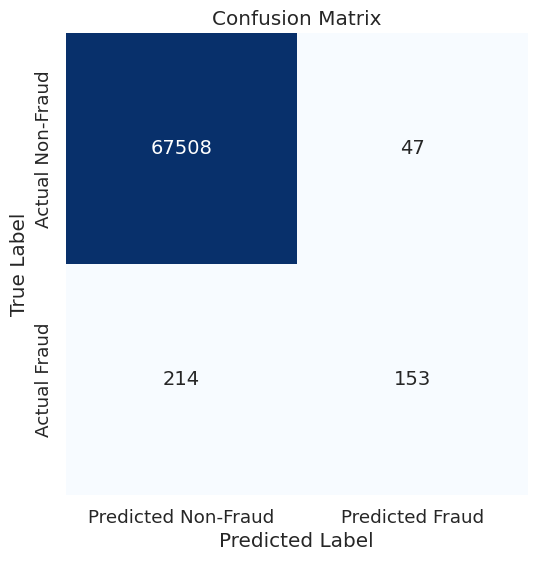

Accuracy: 99.62%
Precision: 0.77
Recall: 0.42
F1 Score: 0.54
ROC AUC Score: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67555
           1       0.77      0.42      0.54       367

    accuracy                           1.00     67922
   macro avg       0.88      0.71      0.77     67922
weighted avg       1.00      1.00      1.00     67922



In [11]:
# Evaluate the model
confusion = confusion_matrix(y_test, y_pred)
# Calculate the confusion matrix
confusion_percent = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100
confusion_df = pd.DataFrame(confusion_percent, index=['Actual Non-Fraud', 'Actual Fraud'], columns=['Predicted Non-Fraud', 'Predicted Fraud'])
print("Confusion Matrix (Percentages):\n")
print(confusion_df,"\n\n")
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, square=True,
            xticklabels=["Predicted Non-Fraud", "Predicted Fraud"],
            yticklabels=["Actual Non-Fraud", "Actual Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Calculate various classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))